In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q1 Support Vector Machine

### Linear SVM

In [2]:
# 1) Load data.

X_and_Y = np.load('./arrhythmia.npy')    # Load data from file.
print(f'X_and_Y.shape: {X_and_Y.shape}')
np.random.shuffle(X_and_Y)    # Shuffle the data.
X = X_and_Y[:, 0:X_and_Y.shape[1] - 1]    # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, X_and_Y.shape[1] - 1]    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

X_and_Y.shape: (452, 280)
(452, 279) (452,)


In [3]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
eighty_percent = round(len(X) * .8)
X_train_val = X[:eighty_percent] # Get features from train + val set.
X_test      = X[eighty_percent:] # Get features from test set.     
Y_train_val = Y[:eighty_percent] # Get labels from train + val set.
Y_test      = Y[eighty_percent:] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(362, 279) (90, 279) (362,) (90,)


In [4]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

svc = svm.SVC()
C_list     = [10 ** -6, 10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1] # Different C to try.
parameters = {'kernel':['linear'], 'C': C_list}
classifier = GridSearchCV(svc, parameters, scoring='accuracy', return_train_score=True)
classifier.fit(X_train_val, Y_train_val)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

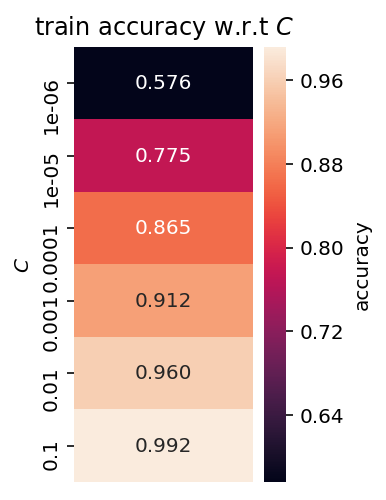

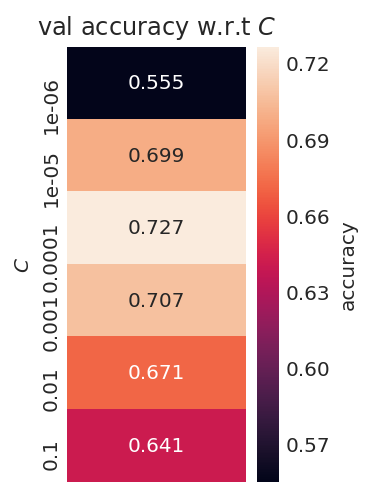

In [5]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

train_acc = classifier.cv_results_['mean_train_score'].reshape(-1, 1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

val_acc = classifier.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [6]:
C_star = .0001 # based on 'val accuracy' heatmap above.

In [7]:
# 5) Use the best C to calculate the test accuracy.
from sklearn.metrics import accuracy_score
clf = svm.SVC(C = C_star)
clf.fit(X_train_val, Y_train_val)
y_pred = clf.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
print(test_acc)

0.555555555556


### SVM with RBF Kernel

In [8]:
# 1) Consider RBF kernel. Perform grid search for best C and gamma 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

svc = svm.SVC()
C_list     = [0.1, 1, 10, 100] # Different C to try.
gamma_list = [10 ** -7 , 10 ** -6 , 10 ** -5 , 10 ** -4] # Different gamma to try.
parameters = {'kernel':['rbf'], 'C': C_list, 'gamma': gamma_list}
classifier = GridSearchCV(svc, parameters, scoring='accuracy', return_train_score=True)
classifier.fit(X_train_val, Y_train_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [1e-07, 1e-06, 1e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

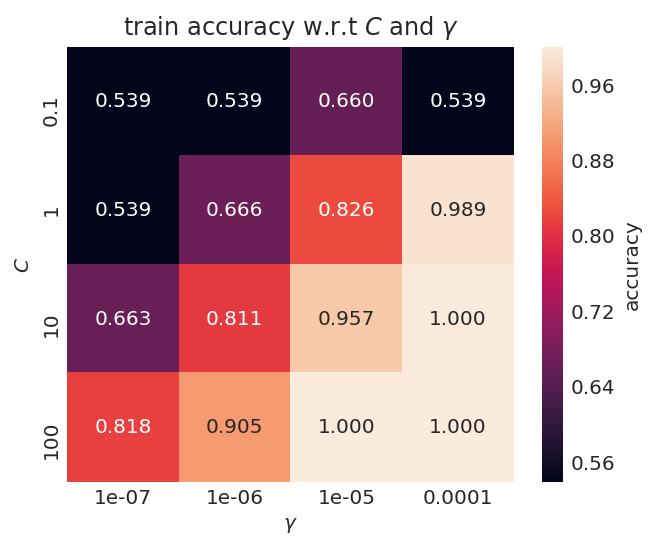

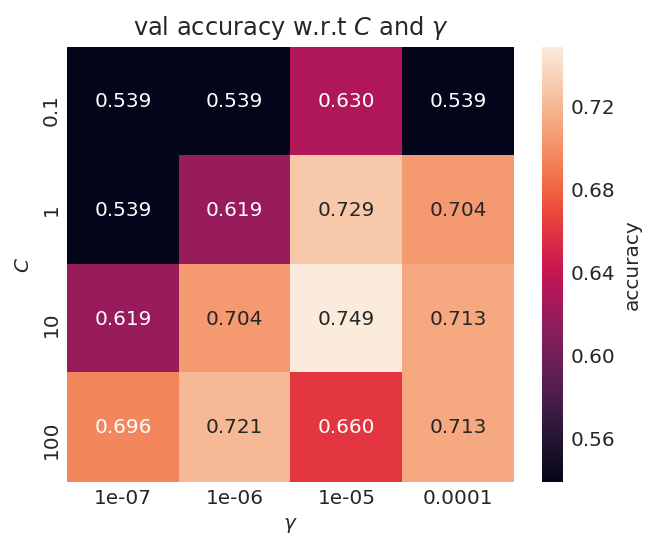

In [10]:
# 2) Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.

def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_RBF() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8, 0.7],
#                             [0.7, 0.9]])
# demo_C_list     = [0.1, 1]
# demo_gamma_list = [0.01, 0.1]
# draw_heatmap_RBF(demo_acc, 'demo accuracy', demo_gamma_list, demo_C_list)
#

train_acc = classifier.cv_results_['mean_train_score'].reshape(4,4)
draw_heatmap_RBF(train_acc, 'train accuracy', gamma_list, C_list)

val_acc   = classifier.cv_results_['mean_test_score'].reshape(4,4)
draw_heatmap_RBF(val_acc, 'val accuracy',gamma_list, C_list)

In [11]:
C_star = 10
gamma_star = 10 ** -5

In [12]:
# 3) Use the best C and gamma to calculate the test accuracy.

clf = svm.SVC(C = C_star, gamma = gamma_star)
clf.fit(X_train_val, Y_train_val)
y_pred = clf.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
print(test_acc)

0.811111111111


### Re-implementation of Cross-validation and Grid Search 

In [13]:
# 1) Implement a simple cross-validation.

def simple_cross_validation(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    start = 0
    for i in range(fold):
        end = int(min(round(len(X_train_val) / fold, 0) * (i + 1), len(X_train_val)))
        X_val = X_train_val[start: end]
        Y_val = Y_train_val[start: end]
        X_train = X_train_val[0: start]
        X_train = np.concatenate((X_train, X_train_val[end:]))
        Y_train = Y_train_val[0: start]
        Y_train = np.concatenate((Y_train, Y_train_val[end:]))
        
        clf = svm.SVC(C = C, gamma = gamma)
        clf.fit(X_train, Y_train)
        val_acc_list.append(clf.score(X_val, Y_val))
        train_acc_list.append(clf.score(X_train, Y_train))
        
        start = end
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [14]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    gamma_list:  The list of gamma values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list), len(gamma_list))
    """
    val_acc_matrix   = np.empty([len(C_list), len(gamma_list)])
    train_acc_matrix = np.empty([len(C_list), len(gamma_list)])
    
    for i in range(len(C_list)):
        for j in range(len(gamma_list)):
            accs = simple_cross_validation(X_train_val, Y_train_val, C_list[i], gamma_list[j], fold)
            val_acc_matrix[i][j] = accs[0]
            train_acc_matrix[i][j] = accs[1]

    return val_acc_matrix, train_acc_matrix

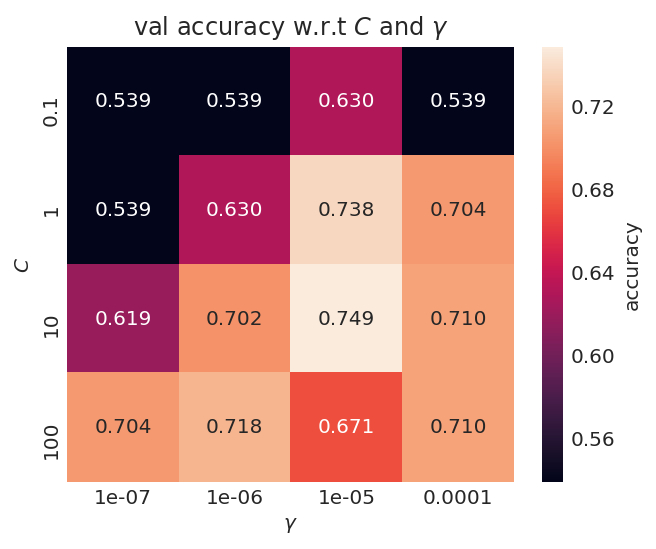

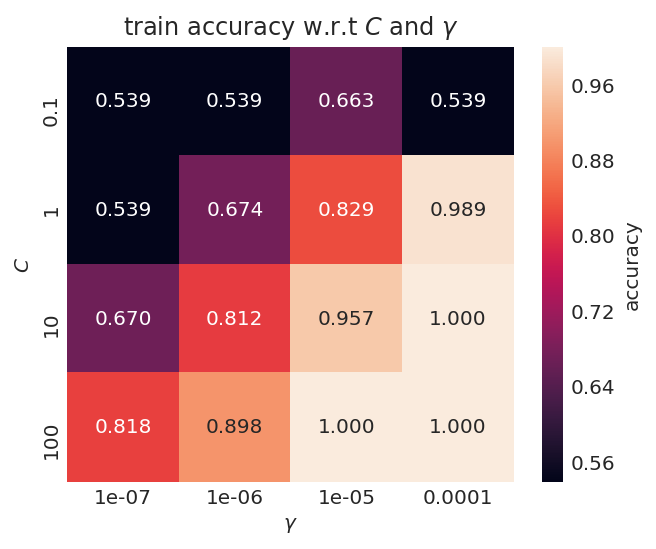

In [15]:
# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, 3)

draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)